Logs   
- [2023/03/08]   
  Restart this notebook if you change the scratch library

- [2024/03/14]    
  No need to restart this notebook when you change the scratch library

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from typing import TypeVar, List, Tuple

In [2]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({
  'font.size': 16,
  'grid.alpha': 0.25})

In [3]:
%load_ext autoreload
%autoreload 2 

Most people think that data science is mostly machine learning and that data  
scienctist mostly build and train and tweak machine learning models all day long.

In fact, data science is mostly 
1. turning business problems into data problems and 
2. collecting data and 
3. understanding data and 
4. cleaning data and formatting data

After that, we can use machine learning to test our model to the cleaned data.

## Modeling

Before we try to understand machine learning. First we need to know what is _model_.

A model is a specification of a mathematical (or probabilistic) relationship  
that exists between different variables.

- Social networking sites:
  - business problem: raising money for your social networking site
  - inputs: number of users, ad revenue per user, number of employees
  - outputs: annual profit for the next several years
  - business model: ex: profit = revenue - expenses, revenue = units solds * average price,
- Cookbook recipes:
  - business problem: creating the best recipes
  - inputs: number of eaters, hungriness
  - outputs: ingredients needed
  - recipe model: trial and error to try different combinations
    of ingredients until on they liked is found.
- Poker game on television:
  - business problem: real time monitoring win probability that is showed 
    on television
  - inputs: the cards that have been revealed so far, distribution of cards
    in the deck 
  - outputs: win probability
  - poker model: based on proability theory, rules of poker, some reasonably   
    innocuous assumption about the random process by which cards are dealt

## What is Machine Learning

(Grus, 2019) Machine learning is a process of creating and using of models that are 
_learned from data_.

The definition of machine learning above is that our goal will be to use existing   
data to develop models that we can use _predict_ various outcomes for new data

Some authors called this definition as _predictive modeling_ or _data mining_.


Some examples of prediction are:
- Whether an email message is spam or not
- Whether a credit card transaction is fraudulent
- Which advertisment a shopper is most likely to click on
- Which footbal team is going to win the Super Bowl


There are four majors type of models in machine learning communities:
- supervised models   
  there is a set of data labeled with the correct answers to learn from
  
- unsupervised models   
  there are no such labels with the correct answers to learn from

- semisupervised models   
  only some of the data are labeled with the correct answers to learn from

- online model   
  the model needs to continuously adjust to newly arriving data

- reinforcement model   
  after the model making a series of predictions, the model gets a signal   
  indicating how well it did

An example of supervised models:   
Given a collection of person's heights and its weights. Determine the model   
that relate those two variables (height and weights). We can use a linear   
model (linear function: $\textrm{weight} = (a\,\times \textrm{height}) + b$)
and estimate $a$ and $b$.

## Overfitting and Underfitting

Overfitting is a situation of a machine learning model that performs well on    
the data we train on it, but generalizes poorly to any new data.

Underfitting is a situation of a machine learning model that does not perform   
well even on the training data, although typically when this happen we decide   
our model isn't good enough and keep looking for a better one.

[You do not need to understand the following code]

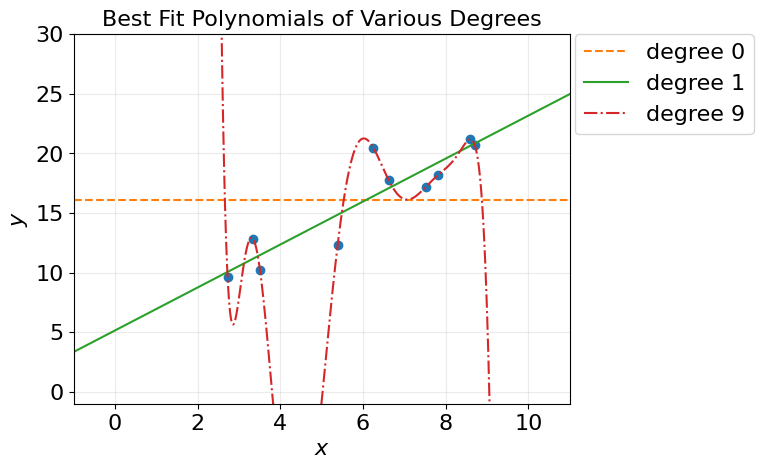

In [4]:
seed = 24_03_07
rng = np.random.default_rng(seed)
true_slope = 2
xrange = [2, 9]
N_data = 10
error_amplitude = 10 
x_data = (xrange[1] - xrange[0])*rng.random(N_data) + xrange[0]
y_data = true_slope*x_data + error_amplitude*rng.random(N_data)

fig, ax = plt.subplots()

ax.plot(x_data, y_data, linestyle="None", marker='o')

ax.set_xlim([-1, 11])
ax.set_ylim([-1, 30])

# -- add fit
for lstyle, degree in zip(["--", "-", "-."], [0, 1, 9]):
  z = np.polyfit(x_data, y_data, degree)
  p = np.poly1d(z)
  x_fit = np.linspace(-1, 11, 1000)
  ax.plot(x_fit, p(x_fit), label=f"degree {degree}", linestyle=lstyle)


ax.set_title("Best Fit Polynomials of Various Degrees", fontsize="medium")
ax.grid("on")
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.legend(loc="upper left", bbox_to_anchor=[1.01, 1], borderaxespad=0)
plt.show(fig)

The training data is `x_data` and `y_data`
- degree 0 (constant polynomial) severely underfits the training data
- degree 9 (10 parameters: $y = a_0 + a_1 x + a_2 x^2 +\ldots + a_9 x^9$)   
  goes through every training data point exactly, but it very severly overfits.
  

To make sure that our model is not too complex (overfitting), we can   
use the techinique of spliting the dataset into train and test.

In here we only showed how to do splitting. The following description
does not show in the code how the splitting helps us to avoid overfitting. 


<img src="./img-resources/ml-describe-split-X.png" width=600>

In [5]:
X = TypeVar('X')   # generic type to represent a data point

def split_data(data: List[X], prob: float) -> Tuple[List[X], List[X]]:
  """Split data into fractions [prob, 1 - prob]""" 
  data = data[:]          # Make a shallow copy
  
  seed = 2023_04_13
  rng = np.random.default_rng(seed)
  rng.shuffle(data)             # because shuffle modifies the list
  cut = int(len(data) * prob)   # Use prob to find a cutoff
  return data[:cut], data[cut:]


data = [n for n in range(1_000)]
train, test = split_data(data, 0.75)

## The proportions should be correct
assert len(train) == 750
assert len(test) == 250

# And the original data should be preserved (in some order)
assert sorted(train + test) == data

The following diagram shows why do we need splitting

<img src="./img-resources/ml-describe-train-test-single-model.png" width=750>

You can split both input and output of dataset to train the supervised models.

<img src="./img-resources/ml-describe-split-Xy.png" width=600>

In [6]:
Y = TypeVar('Y')      # generic type to represent output variables

def train_test_split(xs: List[X], ys: List[Y], test_pct: float) -> Tuple[List[X], List[X], List[Y], List[Y]]:

  # Generate the indices and split them
  idxs = [i for i in range(len(xs))]
  train_idxs, test_idxs = split_data(idxs, 1 - test_pct)

  return ([xs[i] for i in train_idxs],    # x_train
          [xs[i] for i in test_idxs],     # x_test
          [ys[i] for i in train_idxs],    # y_train
          [ys[i] for i in test_idxs])     # y_test

In [7]:
xs = [x for x in range(1000)]       # xs are 1 ... 1000
ys = [2 * x for x in xs]            # each y_i is twice x_i
x_train, x_test, y_train, y_test = train_test_split(xs, ys, 0.25)

# Check that the proportions are correct
assert len(x_train) == len(y_train) == 750
assert len(x_test) == len(y_test) == 250

# Check that the corresponding data points are paired correctly
assert all(y == 2 * x for x, y in zip(x_train, y_train))
assert all(y == 2 * x for x, y in zip(x_test, y_test))

A bigger problem is if you use test/train split not just to judge a model but
also to *choose* from among many models. In that case, although each individual
model may not be overfit, "choosing a model that performs best on the test set"
is a meta-training that makes the test set function as a second training set.
(Of course the model that performed best on the test set is going to perform
well on the test set.).  

In such situation, you should split the data into three parts: a training set for
building models, a *validation* set for choosing among trained models, and a test
set for judging the final model.

<img src="./img-resources/ml-describe-meta-training.png" width=600>
<br>

<img src="./img-resources/ml-describe-train-validation-test.png" width=800>

## Correctness

Two examples of binary classifier.
1. spam message
2. leukemia prevalence for the babies that has name "Luke"


- True positive:   
  This message is spam, and correctly predicted spam   

- False positive (Type 1 error)   
  This message is not spam, but we predicted spam

- False negative (Type 2 error)   
  This message is spam, but we predicted not spam

- True negative    
  This message is not spam, we correctly predicted not spam


Confusion matrix for spam message filter

<table>
  <tr style="background-color:#424242;">
    <th>
    <th> Spam
    <th> Not spam
  <tr>
    <td> Predict "spam"
    <td> True positive
    <td> False positive
  <tr>
    <td> Predict "not spam"
    <td> False negative
    <td> True negative
</table>

Confusion matrix for the babies named Luke having leukemia. From the data
- [5 babies out of 1,000 are named Luke](https://www.babycenter.com/baby-names/details/luke-2918)
- [14 out of every 1,000 people have lifetime prevalence of leukemia](https://seer.cancer.gov/statfacts/html/leuks.html)

<table>
  <tr style="background-color:#424242">
    <th>
    <th> Leukemia
    <th> No leukemia
    <th> Total
  <tr>
    <td> "Luke"
    <td style="text-align:right"> 70
    <td style="text-align:right"> 4,930
    <td style="text-align:right"> 5,000
  <tr>
    <td> Not "Luke"
    <td style="text-align:right"> 13,930
    <td style="text-align:right"> 981,070
    <td style="text-align:right"> 995,000
  <tr>
    <td> Total
    <td style="text-align:right"> 14,000
    <td style="text-align:right"> 986,000
    <td style="text-align:right"> 1,000,000
</table>

In [8]:
def accuracy(tp: int, fp: int, fn: int, tn: int) -> float:
  correct = tp + tn
  total = tp + fp + fn + tn
  return correct / total

assert abs(accuracy(70, 4930, 13930, 981070) - 0.98114) < 1e-5

The binary classifier 98% correct of all the time. We know this is not a   
good classifier (we know exactly in medicine that name of the baby doesn't have   a
anything to do with leukemia!)

We should come up with another measurement how good is our binary classifier:
- precision: how accurate our _positive_ predictions  
  $$
    \text{precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}
  $$
- recall: what fraction of the positives our model indentified
  $$
    \text{recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}
  $$

In [9]:
def precision(tp: int, fp: int, fn: int, tn: int) -> float:
  return tp / (tp + fp)

assert abs(precision(70, 4930, 13930, 981070) - 0.014) < 1e-3

In [15]:
def recall(tp: int, fp: int, fn: int, tn: int) -> float:
  return tp / (tp + fn)

assert abs(recall(70, 4930, 13930, 981070) - 0.005) < 1e-3

From these measurements, we clearly see that the binary classifier is a bad model

Sometimes precision and recall are combined into the F1-score

In [51]:
def f1_score(tp: int, fp: int, fn: int, tn: int) -> float:
  p = precision(tp, fp, fn, tn)
  r = recall(tp, fp, fn, tn)
  return 2 * p * r / (p + r)

assert abs(f1_score(70, 4930, 13930, 981070) - 0.0074) < 1e-4

F1-score is a harmonic mean of precision and recall 
$$
  F_1 = \frac{2}{\text{precision}^{-1} + \text{recall}^{-1}}
      = \frac{2\cdot\text{precision} \cdot \text{recall}}{\text{precision} + \text{recall}}
$$

<table>
  <tr>
    <td> <img src="./img-resources/ml-describe-correctness-extremely-confident.png" height=400 style="object-fit:cover">
    <td> <img src="./img-resources/ml-describe-correctness-a-bit-confident.png" height=400 style="object-fit:cover">
  </tr>
</table>

[You do not need to understand the following code]


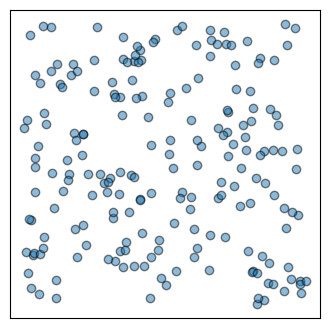

In [50]:
seed = 24_03_07
rng = np.random.default_rng(seed)

data = rng.uniform(size=[200, 2])

fig, ax = plt.subplots(figsize=(4, 4))

ax.plot(data[:, 0], data[:, 1], linestyle="None", marker="o", markeredgecolor="k",
        alpha=0.5)

ax.set_xticks([])
ax.set_yticks([])
plt.show(fig)

## The Bias-Variance Tradeoff

We can see an overfitting problem as a tradeoff between bias and variance

- High bias (model degree 0) and low variance typically correspond to underfitting
- Low bias (model degree 9) and high variance typically correspond to overfitting

If your model has high bias, going from model with degree 0 to degree 1 will   
make a big improvement. Increasing the degree of model is similar to add
more feature (feature $x$, feature $x^2$, ...)

If your model has high variance, going from model with degree 9 to degree 8   
will make a big improvement (or reduce the feature).    
But another solution is to obtain more data (if you can)

Now I will show how the last statement is true form the model with high variance  
and we improve the model capability by acquiring more data

[You do not need to understand the following code]

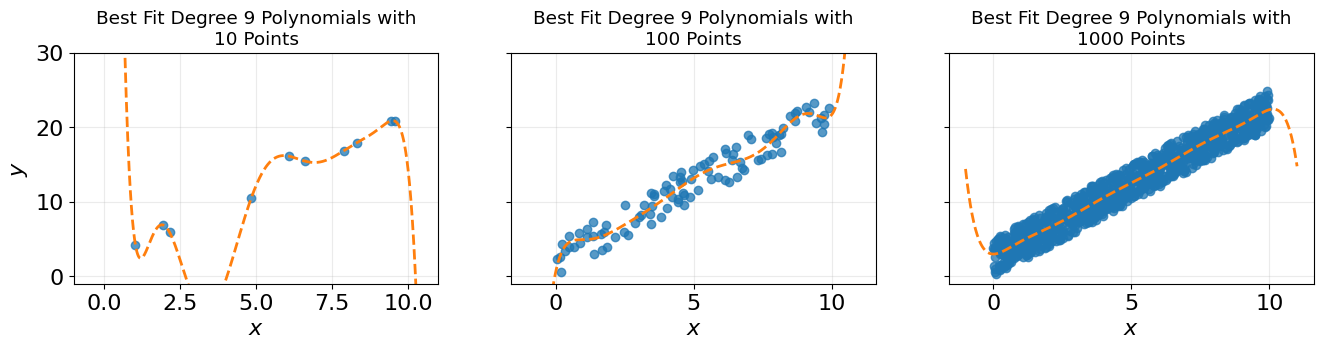

In [34]:
seed = 24_03_07
rng = np.random.default_rng(seed)
true_slope = 2
xrange = [0, 10]
error_amplitude = 5 
degree = 9
N_data_arr = [10, 100, 1000]

dataset = {}
for N_data in N_data_arr:
  x_data = (xrange[1] - xrange[0])*rng.random(N_data) + xrange[0]
  y_data = true_slope*x_data + error_amplitude*rng.random(N_data)
  dataset[N_data] = {"x_data": x_data, "y_data": y_data}

fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(16, 3), sharey=True)


axes[0].set_xlim([-1, 11])
axes[0].set_ylim([-1, 30])
axes[0].set_ylabel("$y$")

# -- add fit
for idx, N_data in enumerate(N_data_arr):
  axes[idx].plot(dataset[N_data]["x_data"], dataset[N_data]["y_data"], 
                  linestyle="None", marker='o', alpha=0.75)
  z = np.polyfit(dataset[N_data]["x_data"], dataset[N_data]["y_data"], degree)
  p = np.poly1d(z)
  x_fit = np.linspace(-1, 11, 1000)
  axes[idx].plot(x_fit, p(x_fit), "--", linewidth=2)

  axes[idx].set_title(f"Best Fit Degree 9 Polynomials with\n{N_data} Points", fontsize="small")
  axes[idx].grid("on")
  axes[idx].set_xlabel("$x$")

plt.show(fig)

## Feature Extraction and Selection

In the previous section, we have mentioned that:
- when our data doesn't have enough feature, our model is likely to underfit
- when our data has too many features, it's easy to overfit

_Features_ are whatever inputs we provided to our model

For an example of spam filter, we want to build an email is junk or not.  
In general we only receive a raw text. We have to extract some features  
that we can process with our model. For example:
1. Does the email contain the word _advertisement_.
2. How many times does the letter _d_ appear?
3. What was the domain of the sender.

The answer to a question 1) is yes-or-no features, question 2) is a number   
(numeric feature), and question 3) is a choice from a discrete set of options   
(categorical features)

Pretty much always, we will extract features from our data that fall into one  
of these three categories. For each category we have a constraint the types  
of model we can use
1. The Naive Bayes classifier is suited for yes-or-no features
2. Regression models is suited for numeric features
3. Decision tree is suited for numeric or categorical features

If you have a huge number of features included in your model, you can use dimensionality   
reduction technique from Chapter 10, and use only the dominant features.    
Or you can put a regularization term to your model such that it penalizes  
models the more features they use

How do we choose features? That's wehere combination of _experience_ and   
_domain expertise_ comes into play.   
